<a href="https://colab.research.google.com/github/MarianVelasquez/Sentiment-Analysis-and-Text-Mining/blob/main/Assigment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d salonimalpani/glass-identification-dataset

ref                                                       title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
sahilislam007/college-student-placement-factors-dataset   College Student Placement Factors Dataset               110450  2025-07-02 08:33:50.547000           6188        130  1.0              
abdulmalik1518/cars-datasets-2025                         Cars Datasets (2025)                                     25987  2025-07-17 21:43:28.493000           2713         64  1.0              
urvishahir/electric-vehicle-specifications-dataset-2025   Electric Vehicle Specs Dataset (2025)🔋🚗                  16631  2025-06-20 07:14:56.777000          10230        246  1.0              
divyaraj2006/social-media-enga

In [4]:
!unzip glass-identification-dataset.zip

Archive:  glass-identification-dataset.zip
  inflating: glass.csv               


In [5]:
import pandas as pd
df=pd.read_csv('glass.csv')

In [6]:
df.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [9]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: >

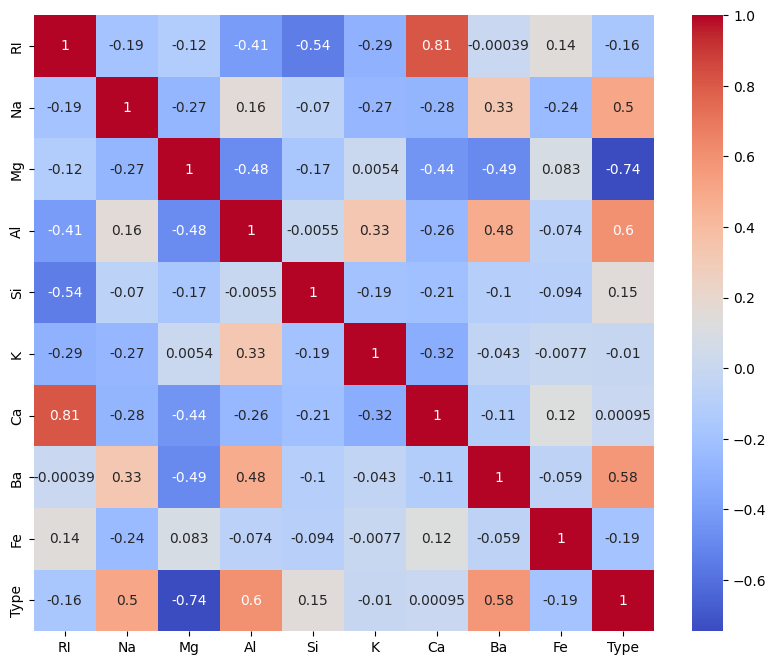

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [13]:
# prompt: split data into targeting an explanatory data

#Split the dataset into explanatory data and target variable
X=df.drop(['Type'],axis=1)
y=df['Type']
# Print the shapes of the resulting datasets
print(X.shape)
y.shape

(214, 9)


(214,)

In [15]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [16]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [17]:
# prompt: spllit the data into train and test

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

X_train shape: (171, 9)
X_test shape: (43, 9)
y_train shape: (171,)
y_test shape: (43,)
Original X shape: (214, 9)
Original y shape: (214,)


In [18]:
from sklearn.linear_model import LogisticRegression

#Inicialize the model
model=LogisticRegression()

#train the model
model.fit(X_train,y_train)

#Predict the model
model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 7, 1, 7, 2, 2, 1, 2, 2, 2, 7, 2, 1, 2, 2, 5, 7, 1, 2, 7, 2, 7,
       7, 7, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 7, 5, 1, 1, 2, 2, 7, 1])

In [19]:
#check probability
y_pred_prob=model.predict_proba(X_train)

In [20]:
y_pred=model.predict(X_train)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [23]:
pd.DataFrame({'Actual':y_train,'Predicted':y_pred,'prob_stay':y_pred_prob[:,0],'prob_leave':y_pred_prob[:,1]})

,Actual,Predicted,prob_stay,prob_leave
79,2,2,0.239850,0.620068
161,3,1,0.647458,0.206824
109,2,7,0.018910,0.216535
127,2,2,0.097368,0.637860
95,2,2,0.364035,0.471878
...,...,...,...,...
106,2,2,0.001103,0.495583
14,1,1,0.560683,0.358347
92,2,2,0.362324,0.498439
179,6,2,0.058849,0.522950


In [29]:
r2_score(y_train, y_pred)

0.6102126385145252

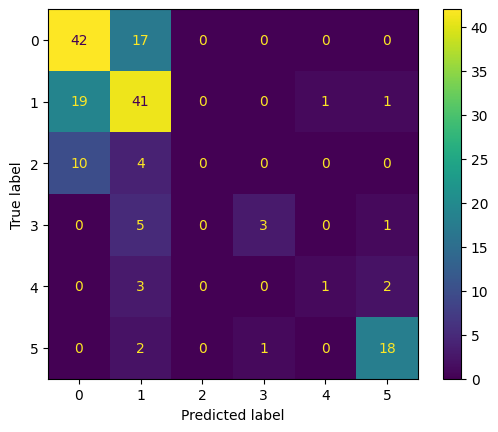

In [24]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_pred)).plot()

In [25]:
import joblib

# Save the model to a file
joblib.dump(model, 'logistic_regression_model.pkl')


Model saved successfully as 'logistic_regression_model.pkl'


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [33]:
r2_score(y_test, y_pred)

0.8996235689191981

In [ ]:
import pickle
pickle.dump(rf,open('glass_model.pkl','wb'))

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)


In [43]:
r2_score(y_test, y_pred)

0.8178342632775367

In [44]:
import pickle
pickle.dump(rf,open('Classifier_glass_model.pkl','wb'))

After testing the R2 scores from the 3 diferents models the best one is Random Forest Regressor, so that is the model selected for the proyect.

Some of the aspects that I considered important is quantity of data available for the model, although it seems to perform well for the model construction. The data set was clean and ready to be used, so it wasnt necessary to clean it or prepare it.